In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates


#Load modified plant 2 datasets
P2=pd.read_csv('archive/Plant2_summed_dataset.csv',na_values= '?')
# display(P2)

P2 = P2[['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
display(P2)



,DATE_TIME,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,26.596148,25.088210,0.0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,0.0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,0.0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,0.0,23.291048,22.373909,0.0


In [125]:
feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# feature_names=['DATE_TIME', 'AC_POWER','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
X = P2[feature_names]
y = P2['AC_POWER']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/34, shuffle=False)


# See that the data is split properly in time. Can add "DATE_TIME" t ofeatures, to verify.
display(X_train)
display(X_test)

#Making scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fitting scaler to the data
scaler.fit(X_test)

#Transform the data to normal distributions
X_test=pd.DataFrame(scaler.transform(X_test))
X_train=pd.DataFrame(scaler.transform(X_train))

display(X_test)



,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,27.004764,25.060789,0.0
1,26.880811,24.421869,0.0
2,26.682055,24.427290,0.0
3,26.500589,24.420678,0.0
4,26.596148,25.088210,0.0
...,...,...,...
2678,23.090081,21.662188,0.0
2679,23.077111,21.622833,0.0
2680,23.062494,21.668886,0.0
2681,22.998344,21.650674,0.0


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2683,23.096334,21.819370,0.0
2684,23.073426,21.868107,0.0
2685,23.198418,21.921284,0.0
2686,23.259188,21.790160,0.0
2687,23.268280,22.156883,0.0
...,...,...,...
3254,23.511703,22.856201,0.0
3255,23.482282,22.744190,0.0
3256,23.354743,22.492245,0.0
3257,23.291048,22.373909,0.0


,0,1,2
0,-1.078654,-0.959122,-0.750711
1,-1.087364,-0.952811,-0.750711
2,-1.039840,-0.945925,-0.750711
3,-1.016735,-0.962904,-0.750711
4,-1.013278,-0.915416,-0.750711
...,...,...,...
571,-0.920725,-0.824858,-0.750711
572,-0.931911,-0.839363,-0.750711
573,-0.980404,-0.871989,-0.750711
574,-1.004621,-0.887312,-0.750711


In [126]:
# NOT ISED!!! Jut example of TimeSeriesSplit

# # import xgboost as xgb
# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# # X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
# # y = np.array([1, 6, 7, 1, 2, 3])

# # model = xgb.XGBRegressor()
# param_search = {'max_depth' : [3, 5]}

# tscv = TimeSeriesSplit(n_splits=2)
# gsearch = GridSearchCV(estimator=model, cv=tscv,
#                         param_grid=param_search)
# gsearch.fit(X, y)

In [127]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_impurity_decrease=0.0, max_depth=None,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")


# from sklearn.tree import plot_tree
# plt.figure(figsize=(10, 3), dpi=300)
# tree_dot = plot_tree(dtr, feature_names=feature_names) # Takes >2min to plot


from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
tscv = TimeSeriesSplit(n_splits=7)
dtr2 = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


Score is 79.1488 %
{'max_depth': 2, 'min_impurity_decrease': 0}
0.872074924516304


In [128]:
results = pd.DataFrame(grid.cv_results_)
display(results)

display(results[['params','mean_test_score','mean_train_score']])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.007433,0.002678,0.003154,0.000522,2,0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
1,0.009822,0.002894,0.004296,0.001572,2,1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
2,0.007185,0.003785,0.003364,0.001128,2,2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
3,0.005234,0.001006,0.002716,0.000747,2,3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
4,0.005375,0.001076,0.002570,0.000862,2,4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.636016,0.936090,0.924337,...,1,0.972646,0.876979,0.895886,0.903178,0.898470,0.895183,0.896527,0.905553,0.028426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.007720,0.001323,0.003225,0.001034,9,10,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.625718,0.805591,0.912747,...,106,0.999257,0.983457,0.968459,0.967409,0.966219,0.960165,0.944190,0.969879,0.016139
116,0.010399,0.004664,0.003585,0.001300,9,11,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.625698,0.805591,0.912747,...,108,0.999256,0.983457,0.968459,0.967409,0.966219,0.960164,0.944189,0.969879,0.016139
117,0.008323,0.002739,0.003803,0.001661,9,12,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.625698,0.805591,0.912749,...,109,0.999256,0.983457,0.968459,0.967408,0.966218,0.960164,0.944188,0.969878,0.016139
118,0.008671,0.002892,0.003230,0.000715,9,13,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.625698,0.808342,0.912749,...,110,0.999256,0.983456,0.968458,0.967408,0.966218,0.960163,0.944187,0.969878,0.016139


,params,mean_test_score,mean_train_score
0,"{'max_depth': 2, 'min_impurity_decrease': 0}",0.859536,0.905553
1,"{'max_depth': 2, 'min_impurity_decrease': 1}",0.859536,0.905553
2,"{'max_depth': 2, 'min_impurity_decrease': 2}",0.859536,0.905553
3,"{'max_depth': 2, 'min_impurity_decrease': 3}",0.859536,0.905553
4,"{'max_depth': 2, 'min_impurity_decrease': 4}",0.859536,0.905553
...,...,...,...
115,"{'max_depth': 9, 'min_impurity_decrease': 10}",0.815882,0.969879
116,"{'max_depth': 9, 'min_impurity_decrease': 11}",0.814251,0.969879
117,"{'max_depth': 9, 'min_impurity_decrease': 12}",0.813705,0.969878
118,"{'max_depth': 9, 'min_impurity_decrease': 13}",0.813702,0.969878


Score is 88.2935 %
{'n_estimators': 6}
0.8979233000540515
0    0.862344
1    0.866450
2    0.867950
3    0.866265
4    0.866811
5    0.866200
6    0.866092
7    0.866045
8    0.865859
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.031366,0.008930,0.011039,0.003600,2,{'n_estimators': 2},0.626356,0.940277,0.929694,0.876104,...,9,0.984960,0.886702,0.908733,0.912742,0.910111,0.906182,0.906646,0.916582,0.029016
1,0.055413,0.008323,0.015117,0.007941,4,{'n_estimators': 4},0.628236,0.934609,0.933282,0.886566,...,3,0.985551,0.901307,0.913490,0.915658,0.911723,0.907949,0.907526,0.920458,0.026927
2,0.067778,0.002675,0.004892,0.003330,6,{'n_estimators': 6},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
3,0.052203,0.009173,0.007048,0.003723,8,{'n_estimators': 8},0.625707,0.933071,0.934566,0.883282,...,4,0.986072,0.900962,0.913488,0.918689,0.911384,0.908327,0.908862,0.921112,0.026987
4,0.048931,0.012027,0.008014,0.007225,10,{'n_estimators': 10},0.625548,0.937735,0.934157,0.882023,...,2,0.986211,0.901188,0.914043,0.918544,0.911313,0.908093,0.909060,0.921207,0.026998
5,0.085717,0.025963,0.005357,0.003459,12,{'n_estimators': 12},0.624387,0.935595,0.933985,0.880962,...,5,0.986233,0.902323,0.914053,0.918853,0.911347,0.908292,0.909101,0.921458,0.026864
6,0.083799,0.016737,0.005298,0.002554,14,{'n_estimators': 14},0.625400,0.935115,0.933963,0.880237,...,6,0.986262,0.902251,0.913974,0.918817,0.911574,0.908262,0.909090,0.921461,0.026876
7,0.084258,0.021352,0.005560,0.003101,16,{'n_estimators': 16},0.626991,0.932733,0.933459,0.880880,...,7,0.986430,0.901973,0.913755,0.918836,0.911526,0.908427,0.909150,0.921443,0.026958
8,0.072915,0.009485,0.003484,0.002279,18,{'n_estimators': 18},0.627279,0.931229,0.933154,0.880290,...,8,0.986370,0.901705,0.913442,0.918875,0.911718,0.908670,0.909105,0.921412,0.026954


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\3329678989.py:35: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\3329678989.py:38: DeprecationWarning: `np.int` is a deprecat

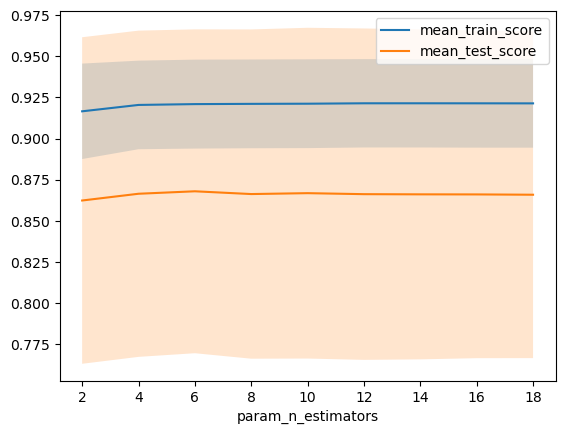

In [223]:

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, min_impurity_decrease=0.0, max_depth=None,  random_state=42, n_jobs=-1)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")




# param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 10), } 
#     # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
# tscv = TimeSeriesSplit(n_splits=7)
# dtr2 = DecisionTreeRegressor(random_state=42)
# grid = GridSearchCV(dtr2, param_grid=param_grid, cv=tscv, return_train_score=True, n_jobs=-1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.score(X_test, y_test))


param_grid_tree = {'n_estimators': range(2,20,2)}
rfr2 = RandomForestRegressor(min_impurity_decrease=0, max_depth=3, max_features=3, random_state=42)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_n_estimators', 'mean_train_score')
results.plot('param_n_estimators', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'max_depth': 3}
0.8979233000540515
0          NaN
1     0.805960
2     0.865783
3     0.867950
4     0.859135
5     0.854515
6     0.848192
7     0.842766
8     0.841656
9     0.840860
10    0.834818
11    0.833988
Name: mean_test_score, dtype: float64


c:\Users\andir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7 fits failed out of a total of 84.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andir\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\andir\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\andir\anaconda3\lib\site-packages\jobl

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.008109,0.002091,0.000000,0.000000,0,{'max_depth': 0},NaN,NaN,NaN,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.023551,0.002814,0.004511,0.001274,1,{'max_depth': 1},0.620318,0.887092,0.885050,0.818425,...,11,0.910561,0.829222,0.850525,0.859447,0.843600,0.837462,0.840421,0.853034,0.025112
2,0.023438,0.003688,0.004220,0.001203,2,{'max_depth': 2},0.642436,0.939217,0.933331,0.881462,...,2,0.976283,0.882829,0.902071,0.907613,0.902783,0.897727,0.899185,0.909784,0.028080
3,0.025921,0.006370,0.004587,0.002261,3,{'max_depth': 3},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
4,0.026947,0.008947,0.004960,0.002441,4,{'max_depth': 4},0.615055,0.921417,0.929172,0.880190,...,3,0.989505,0.922940,0.926604,0.928975,0.919841,0.914621,0.913695,0.930883,0.024505
5,0.026972,0.006602,0.004143,0.000685,5,{'max_depth': 5},0.622708,0.909967,0.931358,0.876499,...,4,0.992290,0.938054,0.939533,0.937393,0.928769,0.922953,0.918182,0.939596,0.022793
6,0.038505,0.014414,0.005316,0.002296,6,{'max_depth': 6},0.616312,0.901431,0.931373,0.865091,...,5,0.994773,0.954966,0.951663,0.946489,0.935948,0.932776,0.925319,0.948848,0.021174
7,0.035709,0.008781,0.012309,0.011877,7,{'max_depth': 7},0.615504,0.899715,0.923772,0.861034,...,6,0.996259,0.962316,0.960306,0.953787,0.944056,0.939535,0.932106,0.955481,0.019519
8,0.033311,0.007328,0.004443,0.001176,8,{'max_depth': 8},0.625389,0.890594,0.918963,0.859428,...,7,0.996269,0.970048,0.967979,0.959957,0.953241,0.947231,0.939969,0.962099,0.017151
9,0.044248,0.012947,0.005234,0.002205,9,{'max_depth': 9},0.630296,0.887858,0.923390,0.860376,...,8,0.996769,0.973780,0.973800,0.966201,0.958676,0.955237,0.947436,0.967414,0.014968


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\899620578.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_depth.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\899620578.py:18: DeprecationWarning: `np.int` is a deprecated al

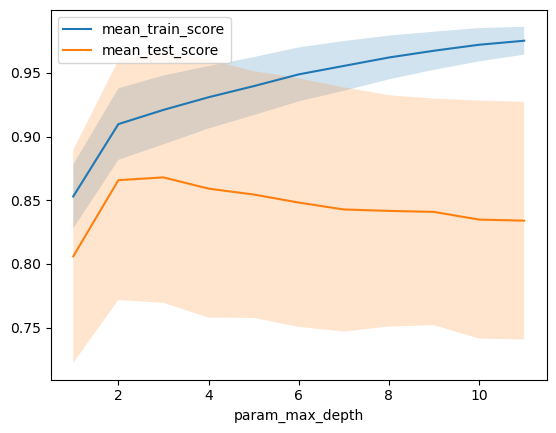

In [130]:
param_grid_tree = {'max_depth': range(0,12,1)}

rfr2 = RandomForestRegressor(n_estimators=6, min_impurity_decrease=0, max_features=3, random_state=42)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_max_depth', 'mean_train_score')
results.plot('param_max_depth', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'min_impurity_decrease': 0}
0.8979233000540515
0    0.86795
1    0.86795
2    0.86795
3    0.86795
4    0.86795
5    0.86795
6    0.86795
7    0.86795
8    0.86795
9    0.86795
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.021690,0.003869,0.004013,0.001120,0,{'min_impurity_decrease': 0},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
1,0.033233,0.011007,0.006280,0.001547,4,{'min_impurity_decrease': 4},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
2,0.028529,0.007466,0.004501,0.001100,8,{'min_impurity_decrease': 8},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
3,0.027254,0.003991,0.004633,0.001729,12,{'min_impurity_decrease': 12},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
4,0.029994,0.004975,0.009020,0.010288,16,{'min_impurity_decrease': 16},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
5,0.029803,0.006706,0.005011,0.001250,20,{'min_impurity_decrease': 20},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
6,0.032478,0.010607,0.004845,0.002218,24,{'min_impurity_decrease': 24},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
7,0.026951,0.005416,0.006535,0.002535,28,{'min_impurity_decrease': 28},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
8,0.031176,0.009017,0.006165,0.002033,32,{'min_impurity_decrease': 32},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038
9,0.032340,0.011766,0.004518,0.001456,36,{'min_impurity_decrease': 36},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\1972711907.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\1972711907.py:18: DeprecationWarning: `np.int` is a

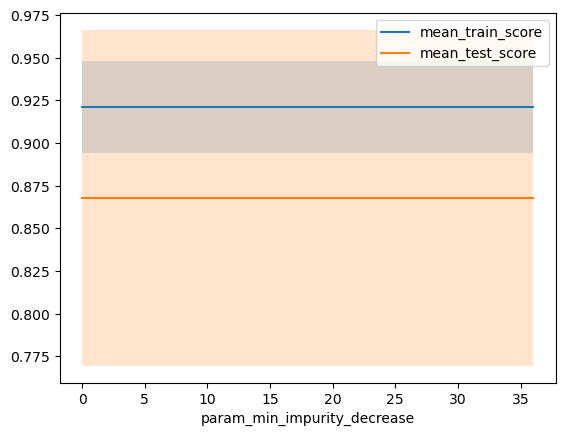

In [131]:
param_grid_tree = {'min_impurity_decrease': range(0,40,4)}

rfr2 = RandomForestRegressor(n_estimators=6, max_depth=3, max_features=3, random_state=42)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_min_impurity_decrease', 'mean_train_score')
results.plot('param_min_impurity_decrease', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

{'max_features': 3}
0.8979233000540515
0    0.851934
1    0.862712
2    0.867950
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.024346,0.004542,0.004679,0.002285,1,{'max_features': 1},0.671175,0.924705,0.926194,0.860045,...,3,0.972417,0.887871,0.900113,0.904345,0.896837,0.894971,0.896260,0.907545,0.026889
1,0.029188,0.006303,0.005017,0.002047,2,{'max_features': 2},0.638004,0.922904,0.938370,0.879093,...,2,0.985878,0.899984,0.910627,0.914727,0.909599,0.906311,0.907320,0.919207,0.027537
2,0.024134,0.003147,0.003382,0.001421,3,{'max_features': 3},0.632034,0.938151,0.933946,0.885246,...,1,0.985974,0.900508,0.913787,0.918518,0.911662,0.908143,0.908143,0.920962,0.027038


c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\909865896.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_features.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_10352\909865896.py:18: DeprecationWarning: `np.int` is a deprecated

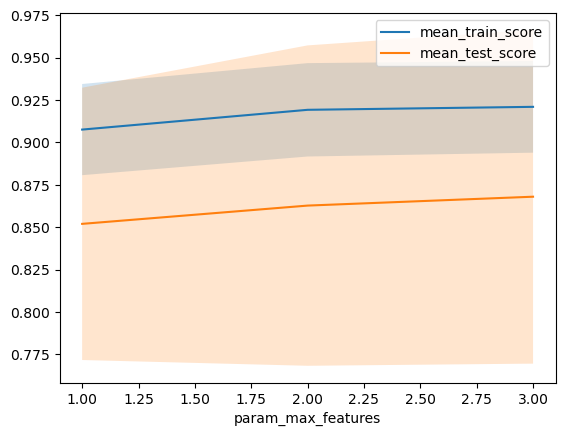

In [132]:
param_grid_tree = {'max_features': range(1,4,1)}

rfr2 = RandomForestRegressor(n_estimators=6, max_depth=3, min_impurity_decrease=0, random_state=42)
grid = GridSearchCV(rfr2, param_grid=param_grid_tree, cv=tscv, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_max_features', 'mean_train_score')
results.plot('param_max_features', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

Score is 89.7923 %


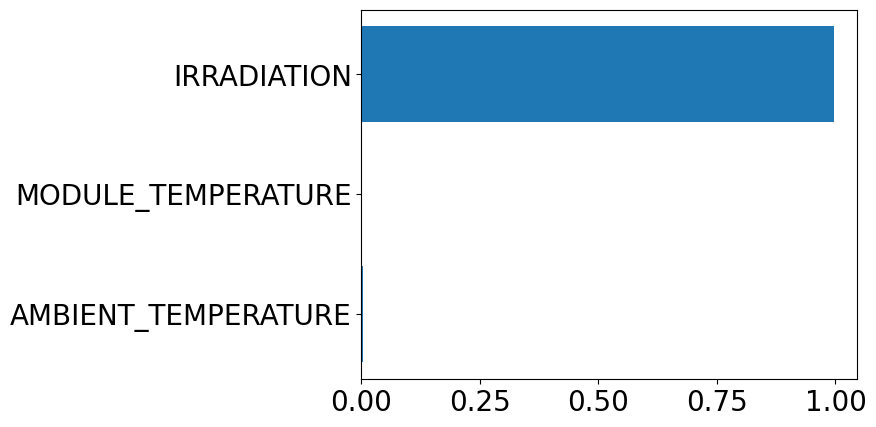

In [133]:
rfr2 = RandomForestRegressor(n_estimators=6, max_depth=3, min_impurity_decrease=0, max_features=3, random_state=42)

rfr2.fit(X_train,y_train)
rfr2_score = rfr2.score(X_test, y_test)
print(f"Score is {rfr2_score*100:.4f} %")


feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)



Score is 88.4183 %


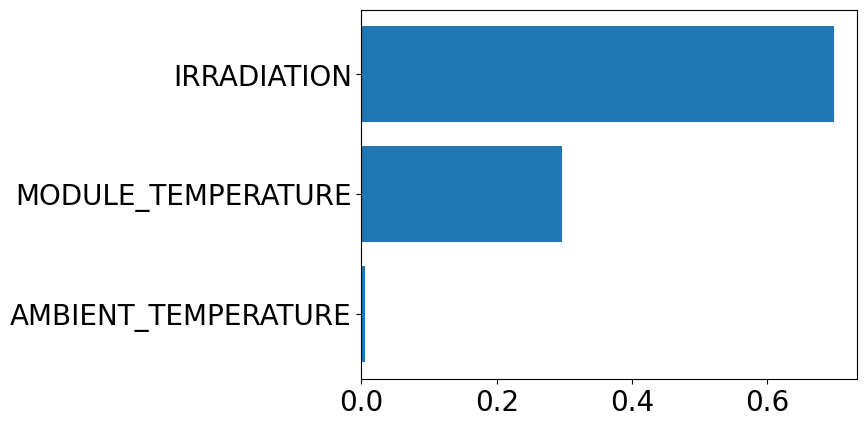

In [134]:
rfr2 = RandomForestRegressor(n_estimators=6, max_depth=3, min_impurity_decrease=0, max_features=2, random_state=42)

rfr2.fit(X_train,y_train)
rfr2_score = rfr2.score(X_test, y_test)
print(f"Score is {rfr2_score*100:.4f} %")


feat_imp = rfr2.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr2.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)


Train score is 90.6777 %
Test score is 89.7923 %


(0.0, 23540.510000000002)

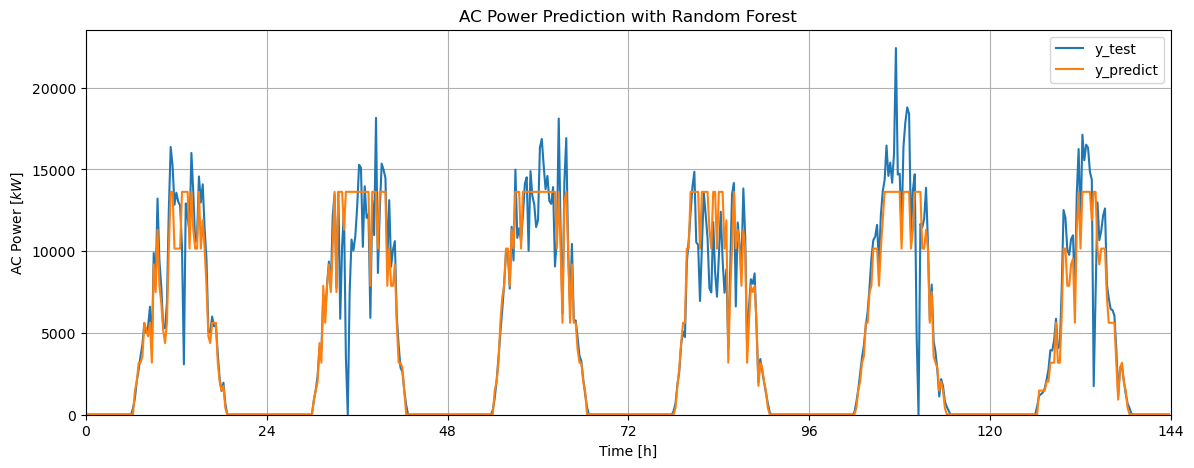

In [231]:

rfr2 = RandomForestRegressor(n_estimators=6, max_depth=3, min_impurity_decrease=0, max_features=3, random_state=42)

rfr2.fit(X_train,y_train)

rfr2_score = rfr2.score(X_train, y_train)
print(f"Train score is {rfr2_score*100:.4f} %")

rfr2_score = rfr2.score(X_test, y_test)
print(f"Test score is {rfr2_score*100:.4f} %")

y_predict = rfr2.predict(X_test)


# display(y_test)
y_test_arr = y_test.to_numpy()
# display(y_test_arr)
# display(y_predict)

NN = y_test_arr.size
# print(NN)
time_step = 0.25 #  in hours
new_time_axis = np.linspace(0, NN*time_step-1*time_step, NN)
# print(new_time_axis.size)



plt.figure(figsize=(14,5))
plt.plot(new_time_axis, y_test_arr, label="y_test")
plt.plot(new_time_axis, y_predict, label="y_predict")
plt.legend()
plt.title("AC Power Prediction with Random Forest")
plt.ylabel("AC Power $[kW]$")
plt.xlabel("Time [h]")
plt.grid()
days = 6
plt.xticks(np.arange(0, 24*(days+1), step=24))  # Set label locations.
plt.xlim(0, 24*days)    
plt.ylim(0,max(y_test_arr)*1.05)



2606   2020-06-12 00:00:00
2607   2020-06-12 00:15:00
2608   2020-06-12 00:30:00
2609   2020-06-12 00:45:00
2610   2020-06-12 01:00:00
               ...        
3177   2020-06-17 22:45:00
3178   2020-06-17 23:00:00
3179   2020-06-17 23:15:00
3180   2020-06-17 23:30:00
3181   2020-06-17 23:45:00
Name: DATE_TIME, Length: 576, dtype: datetime64[ns]

(0.0, 23540.510000000002)

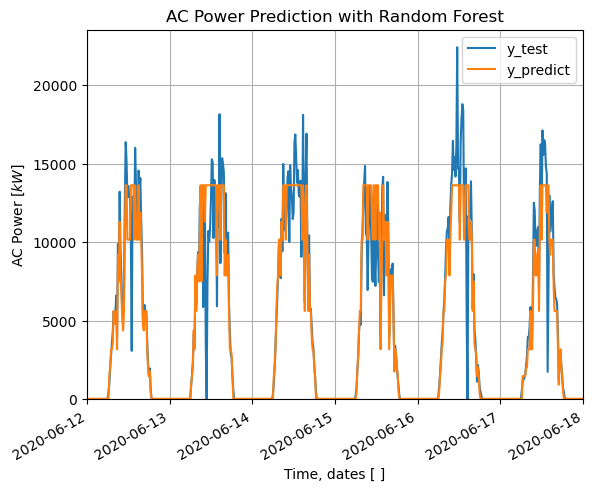

In [217]:
# time_dates = P2.iloc[-NN:,0].to_numpy()

# time_dates = P2[-NN:]["DATE_TIME"]
# time_dates = P2.iloc[-NN:,:]['DATE_TIME']
# # print(time_dates.size)
# display(time_dates)



from helpers import load_data
plant1, plant2, weather1, weather2 = load_data() # I use Mathiases function "load_data()", since this converts "DATE_TIME" to a datetime-format.
time_dates = weather1["DATE_TIME"]
time_dates = time_dates[-NN:]
display(time_dates)


plt.plot(time_dates, y_test_arr, label="y_test")
plt.plot(time_dates, y_predict, label="y_predict")
plt.legend()
plt.title("AC Power Prediction with Random Forest")
plt.ylabel("AC Power $[kW]$")
plt.xlabel("Time, dates [ ]")
plt.grid()
plt.xticks(rotation=30, ha='right')
plt.xlim(np.datetime64('2020-06-12'),np.datetime64('2020-06-18')) 
plt.ylim(0,max(y_test_arr)*1.05)